# Face Emotion Recognition
## Setting Up

You need to import these modeules and libraries before going forward.

1. TensorFlow: An open-source machine learning framework.
2. Keras: A high-level deep learning library that runs on top of TensorFlow.
3. OpenCV (cv2): A computer vision library used for image and video processing.
4. NumPy: A library for numerical computing in Python.
5. itertools: A module that provides various functions for efficient iteration.
6. os: A module for interacting with the operating system, used for file and directory operations.
7. seaborn: A data visualization library based on matplotlib.
8. matplotlib.pyplot: A module from Matplotlib, used for creating plots and visualizations.
9. ImageDataGenerator: A utility in Keras for generating batches of augmented image data.
10. ResNet50, VGG16, InceptionResNetV2: Pre-trained deep learning models available in Keras.
11. EarlyStopping: A callback in Keras for early stopping during model training.
12. ModelCheckpoint: A callback in Keras for saving the best model during training.
13. ReduceLROnPlateau: A callback in Keras for reducing learning rate when a plateau in performance is reached.
14. load_model: A function in Keras for loading a saved model.
15. regularizers: A module in Keras for applying regularization techniques to neural networks.
16. Adam, RMSprop, SGD, Adamax: Optimization algorithms available in Keras.

In [ ]:
import tensorflow as tf
import keras
import cv2
import numpy as np
import itertools
import os
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,Activation,BatchNormalization

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50,VGG16, InceptionResNetV2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax


# Studying the dataset

In [40]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()        
        plt.axis('off')
        plt.imshow(img, cmap='gray') 

In [4]:
train_dir = "../input/fer2013/train" #passing the path with training images
test_dir = "../input/fer2013/test"  #passing the path with testing images

## ANGRY

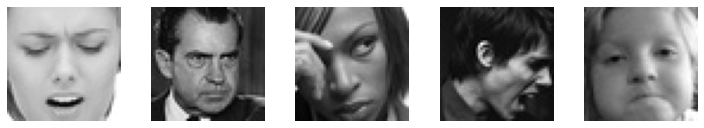

In [44]:
plot_images(train_dir+'/angry')

## DISGUST

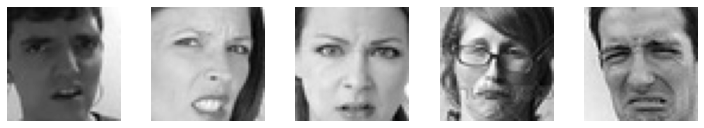

In [45]:
plot_images(train_dir+'/disgust')

## FEAR

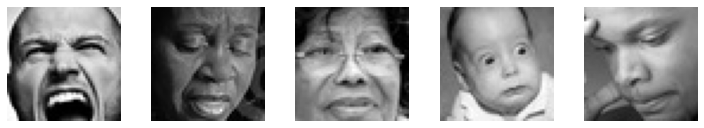

In [46]:
plot_images(train_dir+'/fear')

## HAPPY

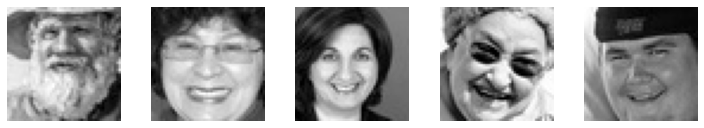

In [47]:
plot_images(train_dir+'/happy')

## NEUTRAL

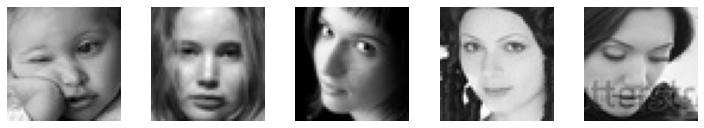

In [48]:
plot_images(train_dir+'/neutral')

## SAD

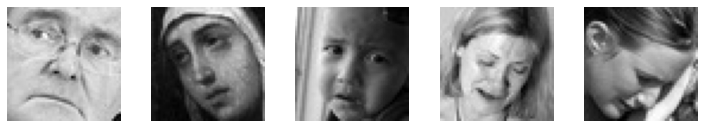

In [49]:
plot_images(train_dir+'/sad')

## SURPRISE

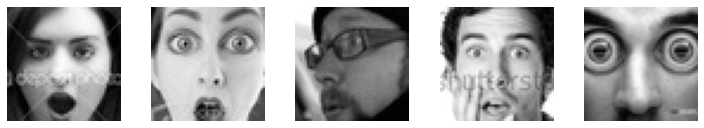

In [50]:
plot_images(train_dir+'/surprise')

 ## Plotting the number of images in each emotion folders

In [51]:
def plot_bar_chart_diagram(path_data):
  dic={}
  for emotion in  os.listdir(path_data):
    dem=0
    for x in os.listdir(path_data+"/"+emotion):
      dem+=1
    dic[emotion]=dem
  print(dic)
  barlist=plt.bar(range(len(dic)), list(dic.values()),tick_label=list(dic.keys()))
#set color
  plt.show()

{'surprise': 3171, 'fear': 4097, 'angry': 3995, 'neutral': 4965, 'sad': 4830, 'disgust': 436, 'happy': 7215}


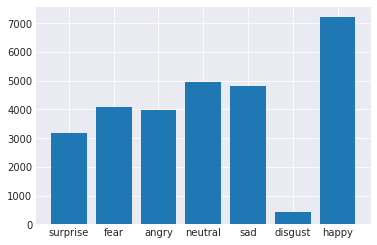

In [52]:
plot_bar_chart_diagram(train_dir)

{'surprise': 831, 'fear': 1024, 'angry': 958, 'neutral': 1233, 'sad': 1247, 'disgust': 111, 'happy': 1774}


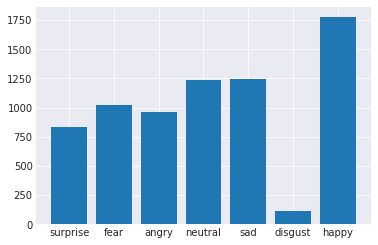

In [53]:
plot_bar_chart_diagram(test_dir)

In [54]:
img_size = 48

## Data Augmentation
This code snippet defines two `ImageDataGenerator` objects, `train_data_gen` and `validation_data_gen`, for data augmentation and preprocessing. It also creates `train_generator` and `validation_generator` to generate batches of augmented and preprocessed image data for training and validation.

In [5]:
train_data_gen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255
                                         )
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        '../input/fer2013/train',
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical')

validation_generator = validation_data_gen.flow_from_directory(
        '../input/fer2013/test',
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Model WIth Transfer Learning

Several models, including ***VGG16***, ***InceptionV2***, and ***ResNet50***, were implemented and evaluated. Among them, the ***ResNet50*** model yielded the best results. 

In [ ]:
#using pretrained model, RESNET50 architecture
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(input_shape=(48,48,3),include_top = False, weights = 'imagenet')

base_model.summary()

In [8]:
emotion_model = Sequential()
emotion_model.add(base_model)
emotion_model.add(Dropout(0.5))
emotion_model.add(Flatten())
emotion_model.add(BatchNormalization())
emotion_model.add(Dense(32,kernel_initializer='he_uniform'))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(32,kernel_initializer='he_uniform'))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(32,kernel_initializer='he_uniform'))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(Dense(7,activation='softmax'))


emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# Model Architechture

In [9]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 2048)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 8192)              32768     
_________________________________________________________________
dense (Dense)                (None, 32)                262176    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation (Activation)      (None, 32)                0

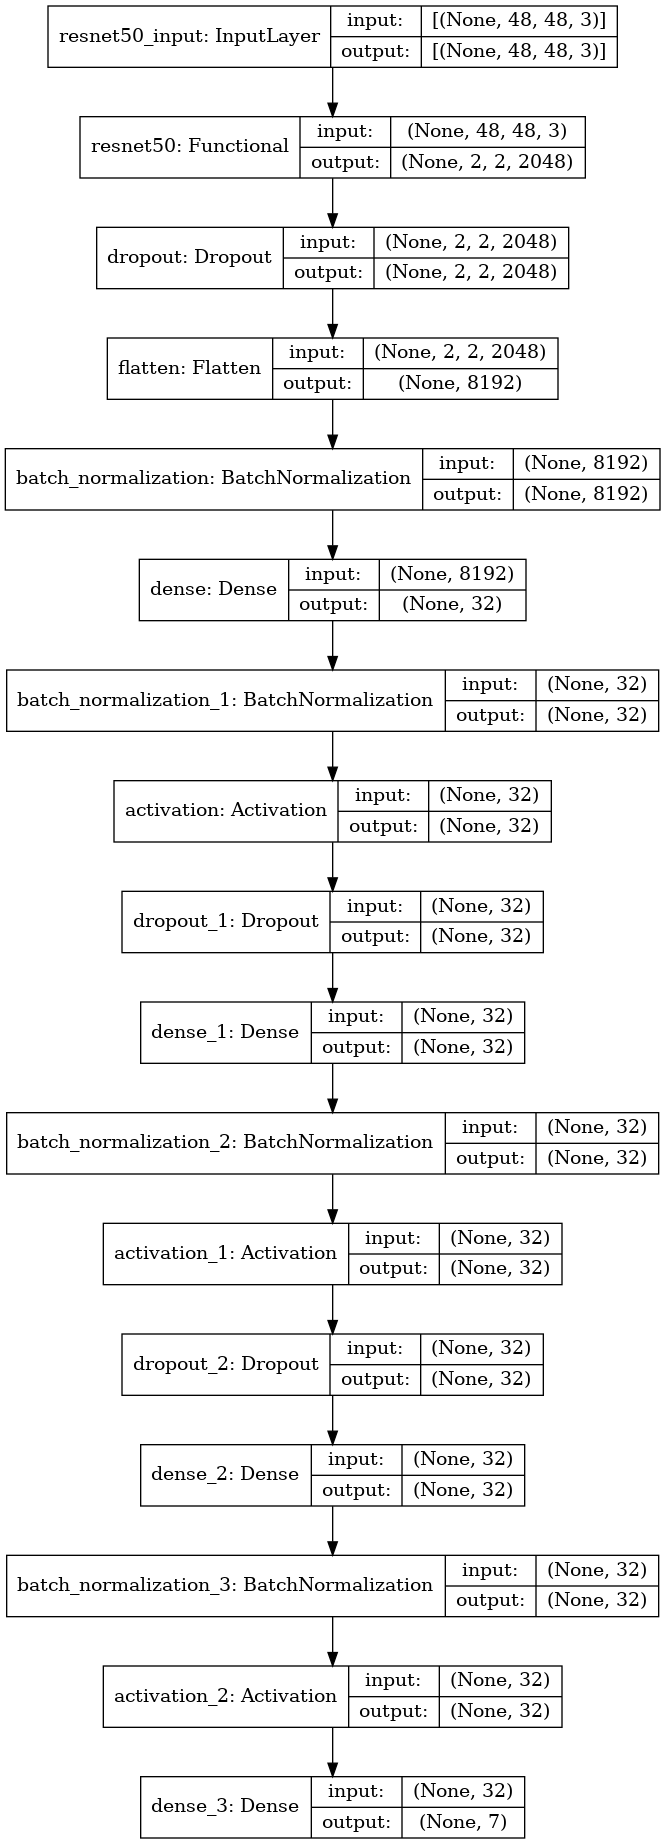

In [11]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(emotion_model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [10]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
mc = ModelCheckpoint('model_resnet.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Training the Model

In [11]:
history = emotion_model.fit_generator(train_generator,steps_per_epoch=28709 // 64,epochs = 60,validation_data = validation_generator,callbacks=[lrd,mc],verbose = 1,validation_steps=7178 // 64)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-08-12 03:27:37.573510: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/60


2022-08-12 03:27:47.480579: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


448/448 [==============================] - 227s 471ms/step - loss: 2.0001 - accuracy: 0.2205 - val_loss: 12.2359 - val_accuracy: 0.1204

Epoch 00001: val_accuracy improved from -inf to 0.12040, saving model to model_resnet.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/60
448/448 [==============================] - 72s 161ms/step - loss: 1.7992 - accuracy: 0.2800 - val_loss: 1.7910 - val_accuracy: 0.2616

Epoch 00002: val_accuracy improved from 0.12040 to 0.26158, saving model to model_resnet.h5
Epoch 3/60
448/448 [==============================] - 71s 159ms/step - loss: 1.6835 - accuracy: 0.3269 - val_loss: 1.5293 - val_accuracy: 0.4238

Epoch 00003: val_accuracy improved from 0.26158 to 0.42383, saving model to model_resnet.h5
Epoch 4/60
448/448 [==============================] - 70s 156ms/step - loss: 1.5809 - accuracy: 0.3813 - val_loss: 1.4287 - val_accuracy: 0.4820

Epoch 00004: val_accuracy improved from 0.42383 to 0.48200, saving model to model_resnet.h5
Epoch 5/60
448/448 [==============================] - 71s 158ms/step - loss: 1.5077 - accuracy: 0.4204 - val_loss: 1.3462 - val_accuracy: 0.5116

Epoch 00005: val_accuracy improved from 0.48200 to 0.51158, saving model to model_resnet.h5
Epoch 6/60
448/448 [============================

## Loading Model to .json file

In [13]:
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)
emotion_model.save_weights("emotion_model_weights.h5")

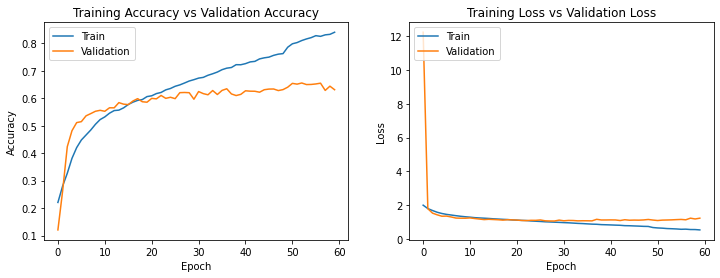

In [14]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Plotting Confusion Matrix

In [15]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap='viridis'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.style.use('seaborn-darkgrid')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
classes= ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [17]:
test_path="../input/emotion-detection-fer/test"
validation_datagen1= ImageDataGenerator(rescale = 1./255)
test1_generator = validation_datagen1.flow_from_directory(directory=test_path, batch_size=64, classes=classes,class_mode="categorical", target_size=(64,64), shuffle=False)
y_true = test1_generator.classes
y_hat =  emotion_model.predict(test1_generator)
y_hat = tf.argmax(y_hat, axis = 1).numpy()


Found 5212 images belonging to 7 classes.


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
accuracy = accuracy_score(y_true, y_hat,)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_true, y_hat,average='micro')
f1 = f1_score(y_true, y_hat,average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.486569
F1 score: 0.486569


Confusion matrix, without normalization
[[599  39  40  94 149  37]
 [  0   0   0   0   0   0]
 [308  14 917 175 321  39]
 [336  35  87 437 305  33]
 [385  35  56 162 583  26]
 [  0   0   0   0   0   0]]


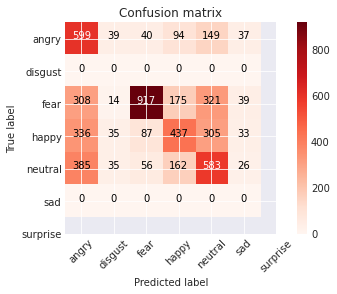

In [27]:
cm = confusion_matrix(y_true = y_true, y_pred = y_hat)
plot_confusion_matrix(cm, classes, cmap = 'Reds')
plt.savefig('confmat.png')